## Import libraries

In [4]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

## Load dataset

In [8]:
data = pd.read_csv('../data/info_per_district_and_meters.csv')
df = pd.read_csv('../data/info_per_apartment.csv')

In [ ]:
data.info()

## Plot functions

In [6]:
def plot_aux(aux, _type, title, log=False, height=800):
    fig = px.bar(aux, x="distrito", y=_type, color="mean_meters", color_continuous_scale='blues')
    layout_dict = {
        'width': 1100,
        'height': height,
        'xaxis': dict(categoryorder='total descending'),
        'yaxis': dict(title="Percentage", type='log') if log else None,
        'title': title,
        'legend_title_text': None,
        'barmode': 'group',
        'template': 'plotly_white'
    }
    fig.update_layout(**layout_dict)
    fig.show()

def plt_scatter(aux, x, y, title, xlabel=None, ylabel=None):
    fig = px.scatter(aux, x=x, y=y, color='distrito')
    layout_dict= {
        'template': 'plotly_white',
        'title': title,
        'xaxis_title': xlabel,
        'yaxis_title': ylabel
    }
    fig.update_layout(**layout_dict)
    fig.show()

## Average square meters

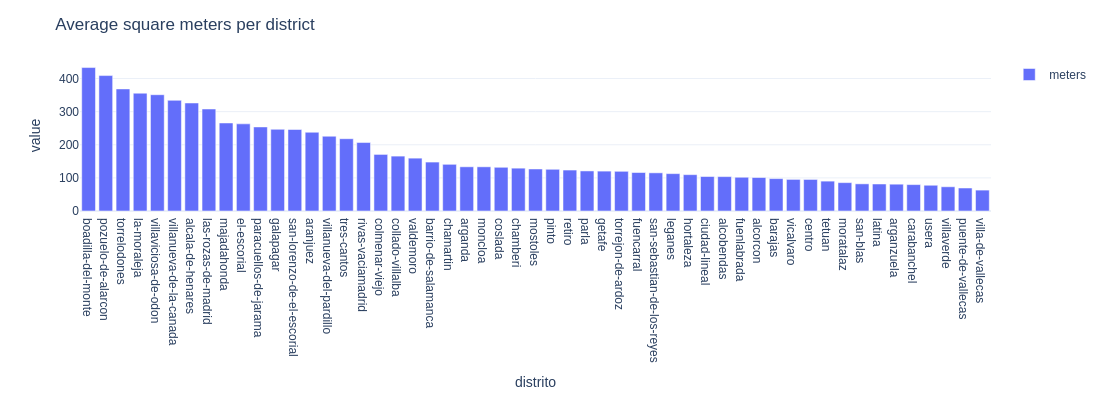

In [9]:
average_meters = df.groupby('distrito')['meters'].mean()
fig = px.bar(average_meters, color_continuous_scale=['blues'])
fig.update_layout(
    width=1100,
    height=400,
    title="Average square meters per district",
    xaxis={'categoryorder': 'total descending'},
    legend_title_text=None,
    template='plotly_white')
fig.show()

## Percentage of selling/renting apartments per district

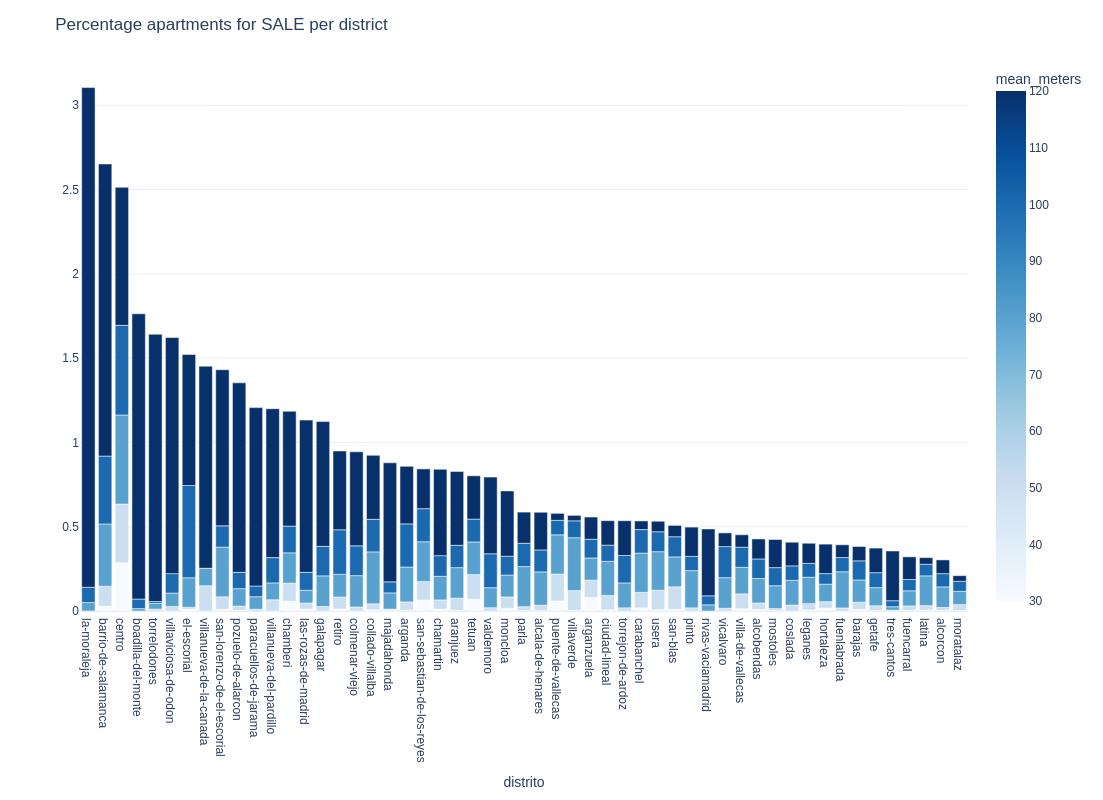

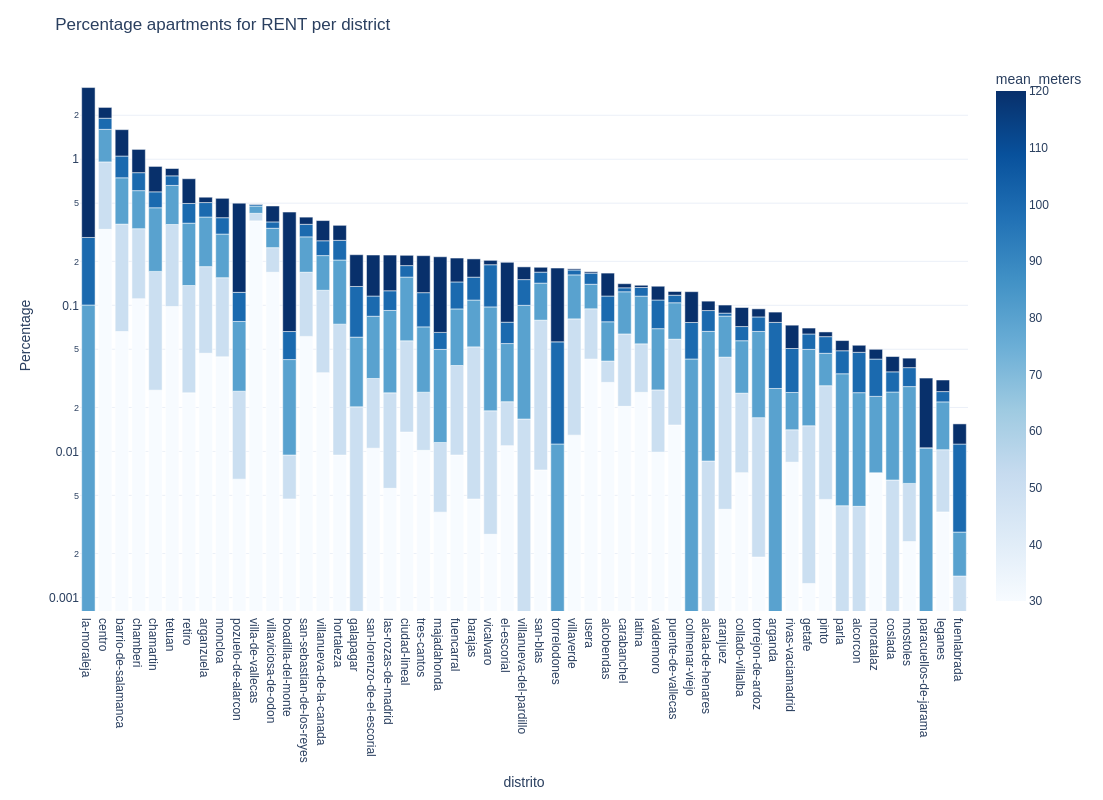

In [11]:
aux = data[['distrito', 'mean_meters', 'apartments', 'size_sell', 'size_rent']].copy()

aux.loc[:, '%sell'] = (aux['size_sell'] / aux['apartments']) * 100
aux.loc[:, '%rent'] = (aux['size_rent'] / aux['apartments']) * 100

title = 'Percentage apartments for SALE per district'
plot_aux(aux, "%sell", title=title)
title = 'Percentage apartments for RENT per district'
plot_aux(aux, "%rent", title=title, log=True)

## Average price per square meter (€/m²)

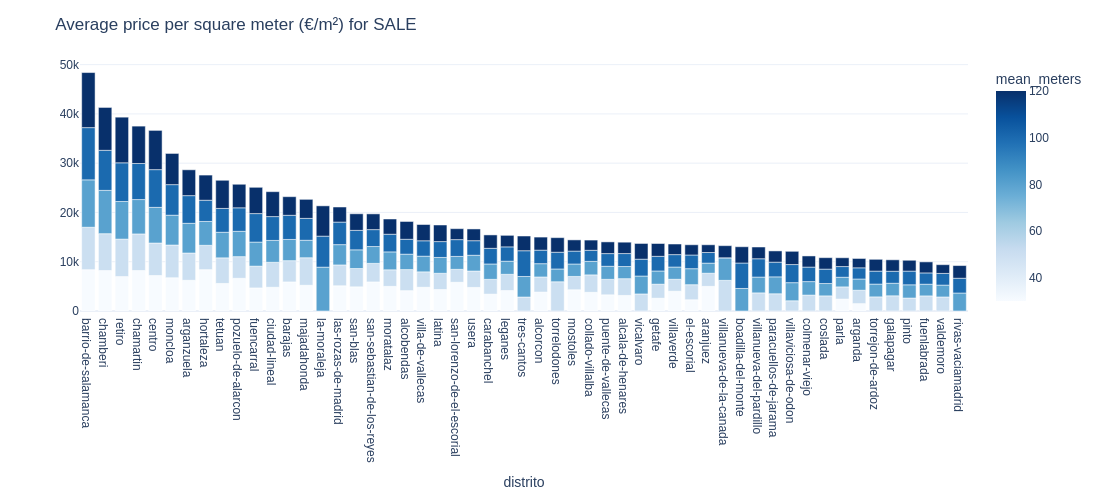

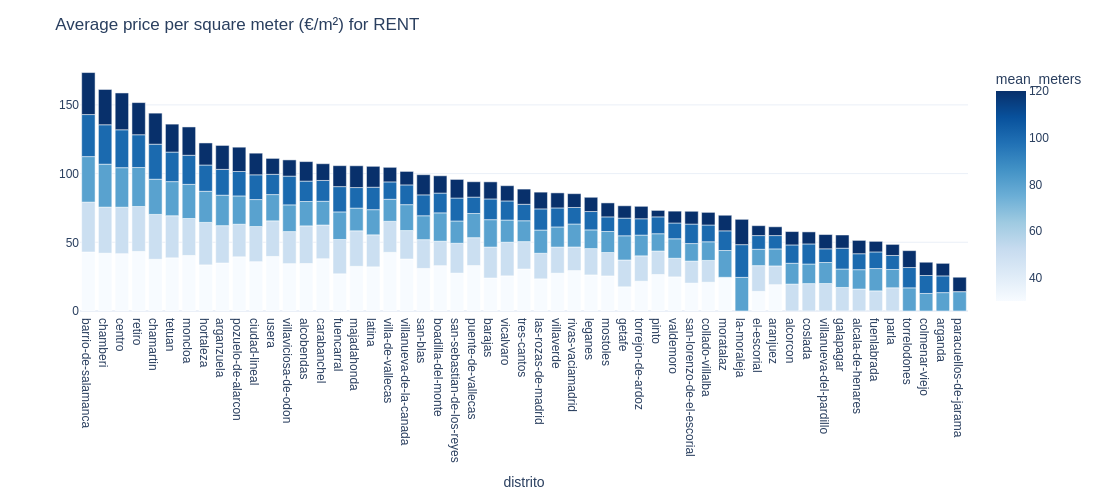

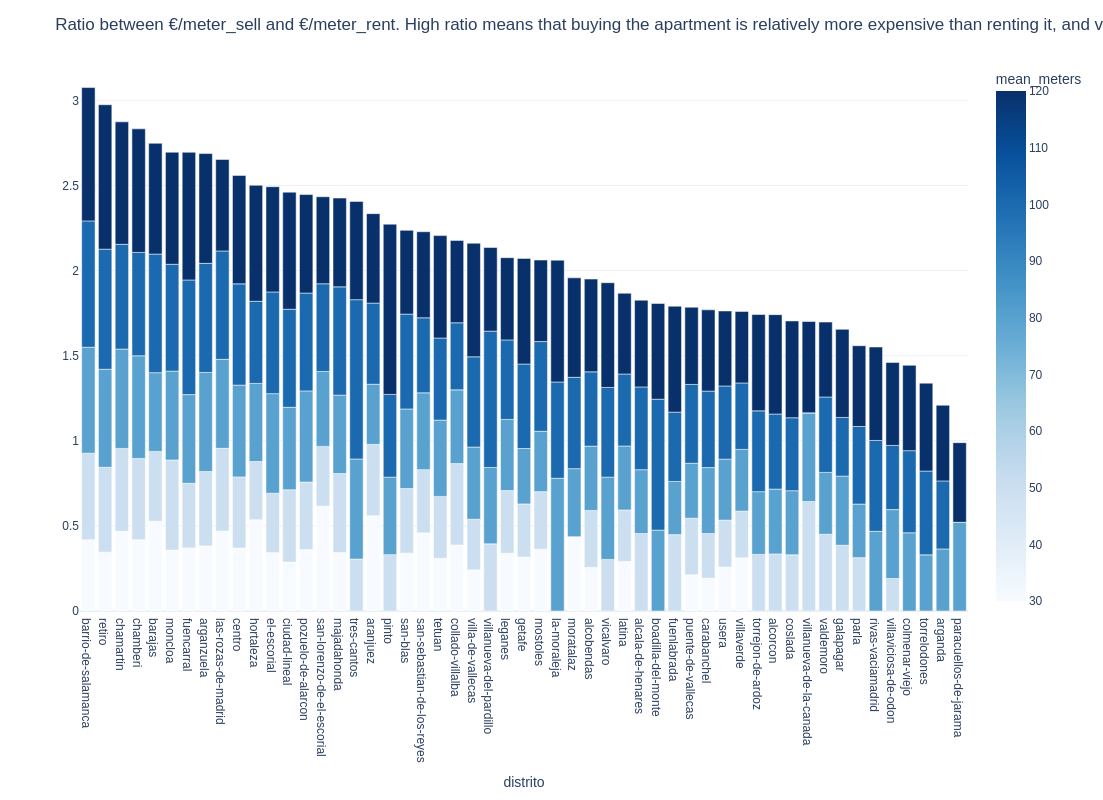

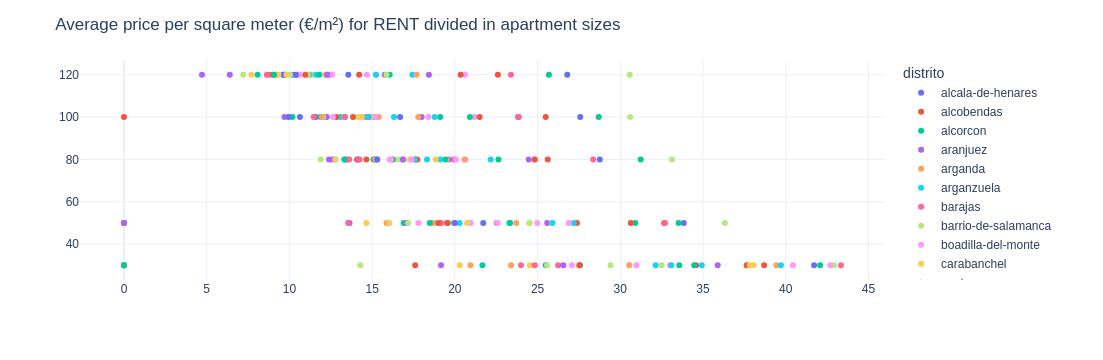

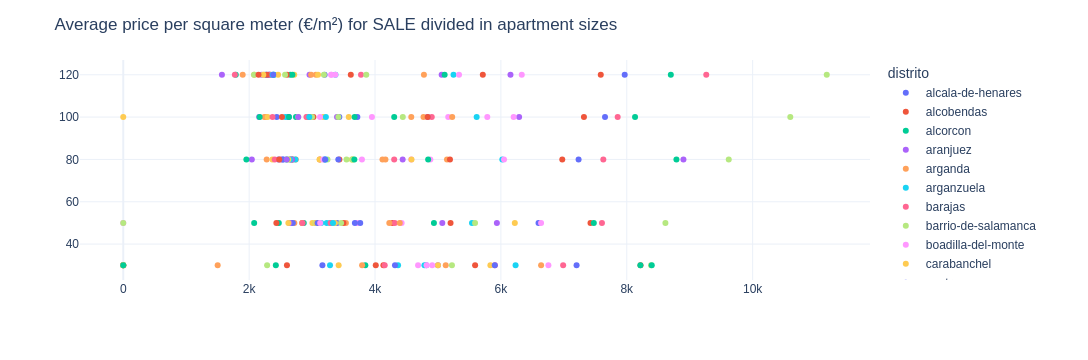

In [12]:
aux = data[['distrito', 'mean_meters', 'apartments', '€/meter_rent', '€/meter_sell']].copy()

title = 'Average price per square meter (€/m²) for SALE'
plot_aux(aux, "€/meter_sell", title=title, height=500)

title = 'Average price per square meter (€/m²) for RENT'
plot_aux(aux, "€/meter_rent", title=title, height=500)


def calculate_ratio(x):
    return x['€/meter_sell'] / x['€/meter_rent'] if x['€/meter_rent'] > 0 else 0
aux['ratio'] = aux.apply(calculate_ratio, axis=1)
aux['norm_ratio'] = (aux['ratio'] - aux['ratio'].min()) / (aux['ratio'].max() - aux['ratio'].min())

title = 'Ratio between €/meter_sell and €/meter_rent. High ratio means that buying the apartment is relatively more expensive than renting it, and viceversa'
plot_aux(aux, 'norm_ratio', title=title)


title = 'Average price per square meter (€/m²) for RENT divided in apartment sizes'
plt_scatter(data, x='€/meter_rent', y='mean_meters', title=title)
title = 'Average price per square meter (€/m²) for SALE divided in apartment sizes'
plt_scatter(data, x='€/meter_sell', y='mean_meters', title=title)

## Correlation between price and meters

In [ ]:
grouped = df.groupby('distrito').agg({'price': 'mean', 'meters': 'mean'}).reset_index()

slope, intercept = np.polyfit(grouped['meters'], grouped['price'], 1)
trend_x = np.linspace(grouped['meters'].min(), grouped['meters'].max(), 100)
trend_y = slope * trend_x + intercept

fig = px.scatter(grouped, x='meters', y='price', color='distrito')
fig.add_traces(px.line(x=trend_x, y=trend_y).data)
fig.update_layout(
    width=1000,
    height=500,
    title='Average Price vs. Meters by district',
    xaxis_title='Average Meters',
    yaxis_title='Average Price',
    legend_title='Distrito',
    template='plotly_white'
)

## Average advertisement time

In [ ]:
aux = data[['distrito', 'mean_meters', 'advertised_rent', 'advertised_sell']].copy()

aux['advertised_rent'] = aux['advertised_rent'].apply(lambda x: x / (60*24*30)) # Transform from minutes to months
aux['advertised_sell'] = aux['advertised_sell'].apply(lambda x: x / (60*24*30)) # Transform from minutes to months

title = 'Average number of months apartments are advertised in Idealista for SALE'
plt_scatter(aux, x='advertised_rent', y='mean_meters', title=title, xlabel='Months')
title = 'Average number of months apartments are advertised in Idealista for RENT'
plt_scatter(aux, x='advertised_sell', y='mean_meters', title=title, xlabel='Months')

## PER, PER adjusted and gross rental yield

In [ ]:
aux = data[['distrito', 'RB', 'PER', 'PER_adjusted', 'mean_meters']].copy()
title = 'Gross rental yield vs PER'
plt_scatter(aux, x='PER', y='RB', title=title, xlabel='PER (Years)', ylabel='Gross rental yield')

title = 'PER vs PER_adjusted (Years)'
plt_scatter(aux, x='PER_adjusted', y='PER', title=title, xlabel='PER_adjusted (Years)', ylabel='PER (Years)')

plt_scatter(aux, x='PER', y='mean_meters', title='PER per meters', xlabel='PER (Years)')
plt_scatter(aux, x='RB', y='mean_meters', title='Gross rental yield per meters', xlabel='')

## Compare change selling/renting rate 2014-2024

In [ ]:
aux = data[['distrito', 'mean_meters', 'change_2014_2024_sell', 'change_2014_2024_rent', 'change_2021_2024_sell', 'change_2021_2024_rent']].copy()
plt_scatter(aux, x='change_2014_2024_sell', y='change_2014_2024_rent', title='Change rate 2014-2024 sell vs rent')
plt_scatter(aux, x='change_2021_2024_sell', y='change_2021_2024_rent', title='Change rate 2021-2024 sell vs rent')
plt_scatter(aux, x='change_2014_2024_sell', y='change_2021_2024_sell', title='Change rate 2014-2024 sell vs rent')
plt_scatter(aux, x='change_2014_2024_rent', y='change_2021_2024_rent', title='Change rate 2014-2024 sell vs rent')

In [ ]:
sorted_aux = aux.sort_values('change_2021_2024_sell')

fig = px.line(sorted_aux, x='distrito', y='change_2021_2024_sell',
              title='Change from 2021 to 2024 Sell by District')
fig.update_layout(
    height=400
)
fig.show()